## Importing library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load the data and check for basic informations

In [ ]:
df=pd.read_csv('/content/LoanData.csv')

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isnull().sum()


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.nunique()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [ ]:
df.duplicated().sum()

0

## Data Cleaning

# Drop id columns

In [ ]:
df.drop('Loan_ID',axis=1,inplace=True)

# Replace missing values

In [ ]:
#categorical columns
cate_col=df.select_dtypes(include='object').columns
for col in cate_col:
  df[col].fillna(df[col].mode()[0],inplace=True)
#numeric col
num_col=df.select_dtypes(include='number').columns
for col in num_col:
  if col in ['Credit_History']:
    df[col].fillna(df[col].mode()[0],inplace=True)
  else:
    df[col].fillna(df[col].median(),inplace=True)
print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# Encoding categorical values

In [ ]:
df=pd.get_dummies(df)
df.drop(['Gender_Female','Married_No','Education_Not Graduate','Self_Employed_No','Loan_Status_N'],inplace=True,axis=1)
df.rename(columns={'Gender_Male':'Gender','Married_Yes':'Married','Education_Graduate':'Education','Self_Employed_Yes':'Self_Employed','Loan_Status_Y':'Loan_Status'},inplace=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,128.0,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True


## Explore data

# Categorical columns

<ipython-input-76-46e842ce8947>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Female','Male'])
<ipython-input-76-46e842ce8947>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['No','Yes'])
<ipython-input-76-46e842ce8947>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['Not Graduate','Graduate'])
<ipython-input-76-46e842ce8947>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['No','Yes'])
<ipython-input-76-46e842ce8947>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(['N','Y'])


<Axes: xlabel='Credit_History', ylabel='count'>

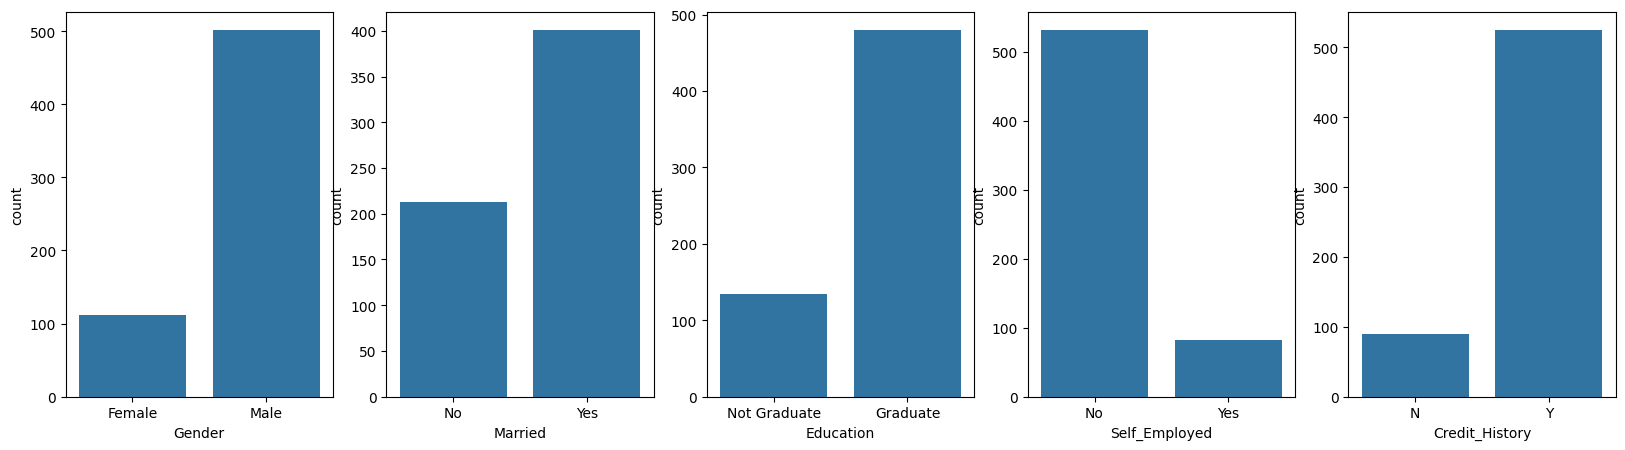

In [ ]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(20,5))

ax1.set_xticklabels(['Female','Male'])
sns.countplot(x='Gender',data=df,ax=ax1)
ax2.set_xticklabels(['No','Yes'])
sns.countplot(x='Married',data=df,ax=ax2)
ax3.set_xticklabels(['Not Graduate','Graduate'])
sns.countplot(x='Education',data=df,ax=ax3)
ax4.set_xticklabels(['No','Yes'])
sns.countplot(x='Self_Employed',data=df,ax=ax4)
ax5.set_xticklabels(['N','Y'])
sns.countplot(x='Credit_History',data=df,ax=ax5)



<ipython-input-77-178171eda627>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','1','2','3+'])
<ipython-input-77-178171eda627>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Rural','SemiUrban','Urban'])


<Axes: title={'center': 'Loan Amount Term'}, xlabel='Loan_Amount_Term', ylabel='count'>

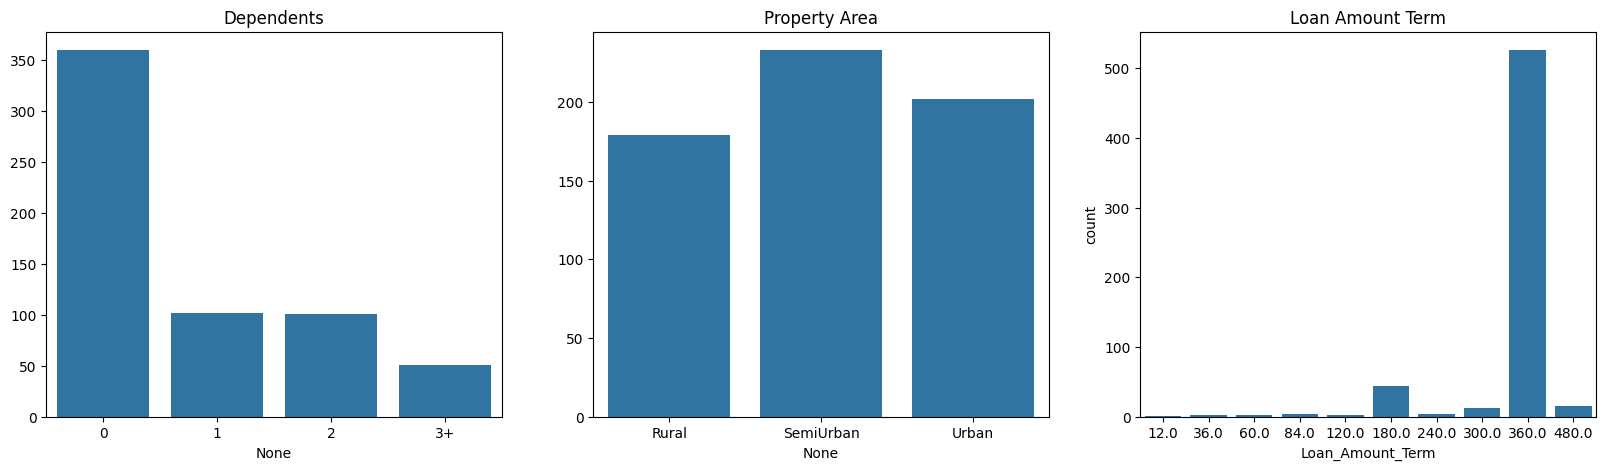

In [ ]:
sums1=df[['Dependents_0','Dependents_1','Dependents_2','Dependents_3+']].sum()
sums2=df[['Property_Area_Rural','Property_Area_Semiurban','Property_Area_Urban']].sum()

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))

ax1.set_xticklabels(['0','1','2','3+'])
ax1.set_title('Dependents')
sns.barplot(x=sums1.index,y=sums1.values,ax=ax1)

ax2.set_title('Property Area')
ax2.set_xticklabels(['Rural','SemiUrban','Urban'])
sns.barplot(x=sums2.index,y=sums2.values,ax=ax2)

ax3.set_title('Loan Amount Term')
sns.countplot(x='Loan_Amount_Term',data=df,ax=ax3)

# Numeric variables

<Axes: xlabel='LoanAmount', ylabel='Count'>

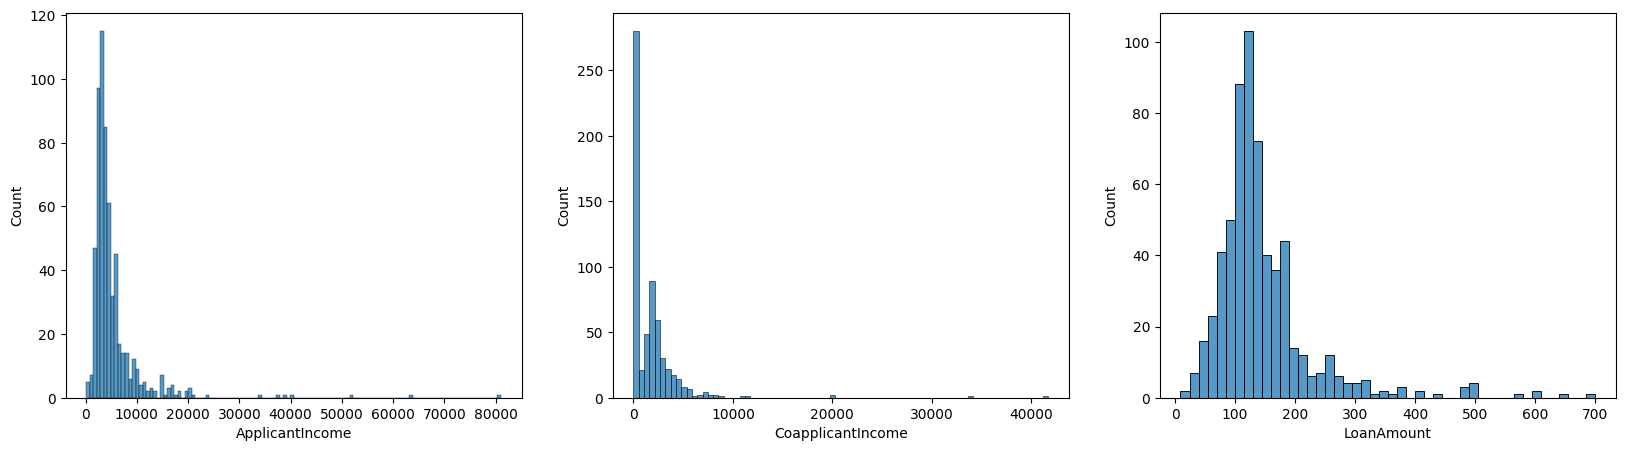

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))
sns.histplot(df['ApplicantIncome'],ax=ax1)
sns.histplot(df['CoapplicantIncome'],ax=ax2)
sns.histplot(df['LoanAmount'],ax=ax3)

There are some outliners that make the data have positive devitation, we need to remove there outliners

In [ ]:
for col in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

df[['ApplicantIncome']]=np.sqrt(df[['ApplicantIncome']])
df[['CoapplicantIncome']]=np.sqrt(df[['CoapplicantIncome']])
df[['LoanAmount']]=np.sqrt(df[['LoanAmount']])


<Axes: xlabel='LoanAmount', ylabel='Count'>

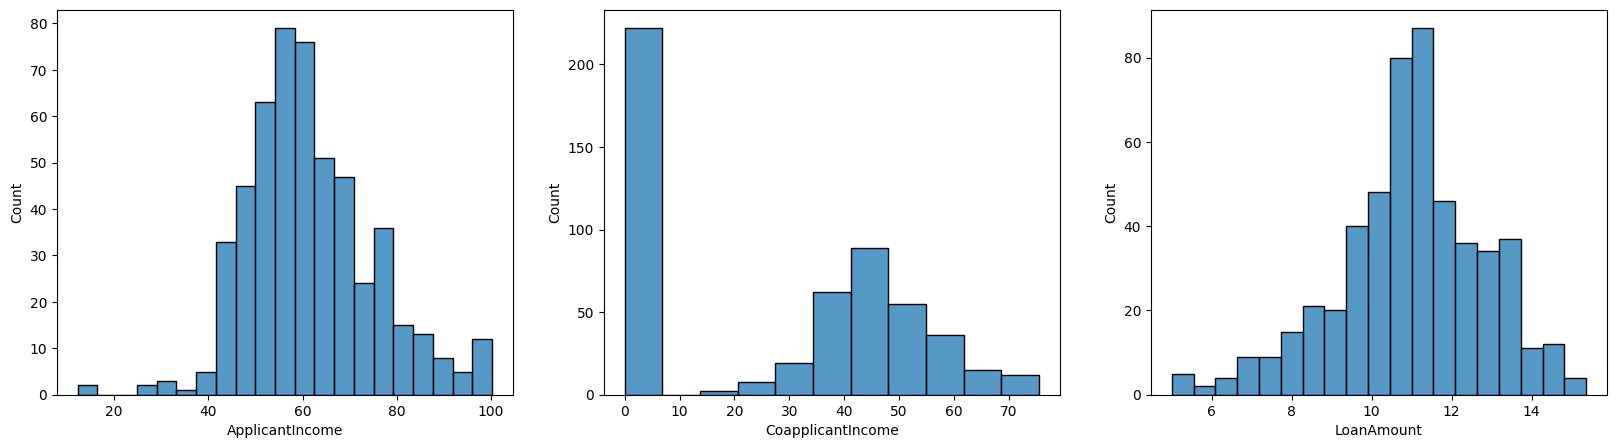

In [ ]:
#Applicant Income, CoapplicantIncome and Loan Amount after removing outliners

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,5))
sns.histplot(df['ApplicantIncome'],ax=ax1)
sns.histplot(df['CoapplicantIncome'],ax=ax2)
sns.histplot(df['LoanAmount'],ax=ax3)

# Other exploration

<Axes: >

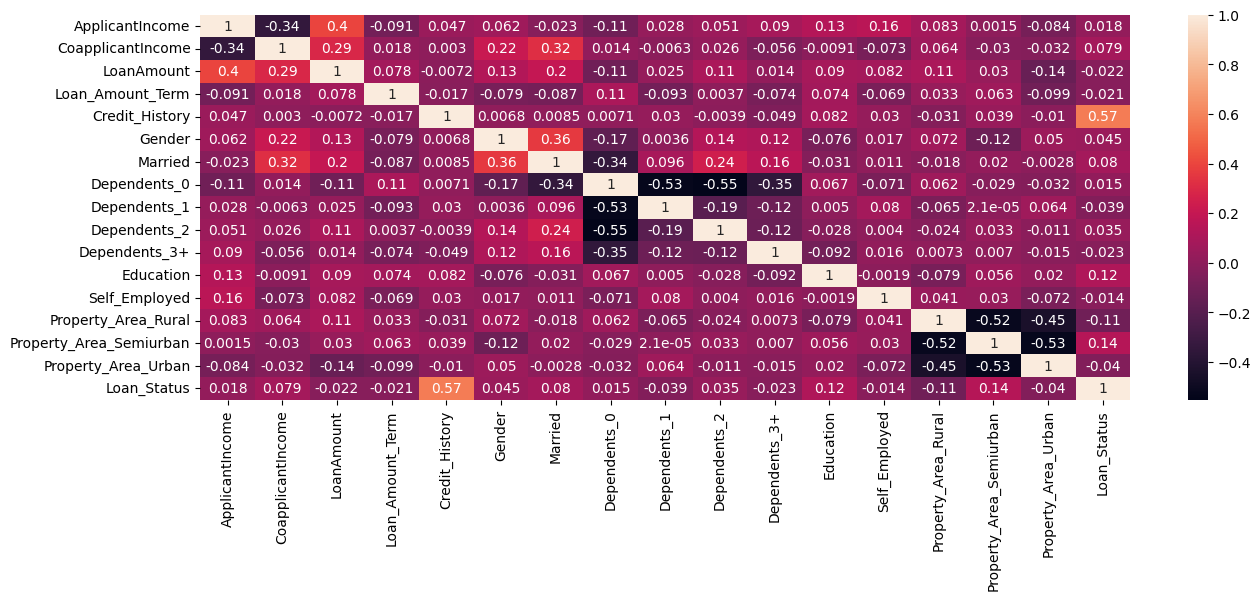

In [ ]:
fig,(ax1)=plt.subplots(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,ax=ax1)

<Axes: xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>

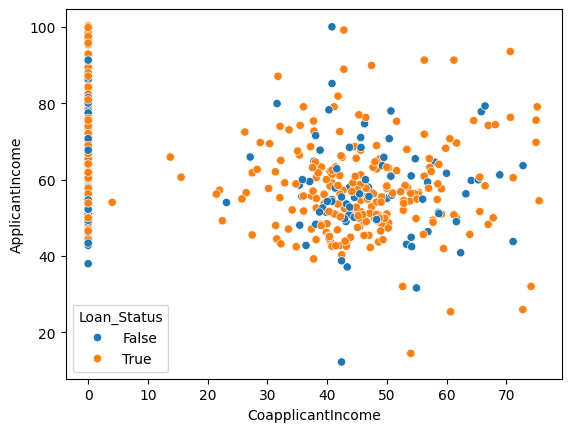

In [ ]:
sns.scatterplot(x='CoapplicantIncome',y='ApplicantIncome',data=df,hue='Loan_Status')

<Axes: xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>

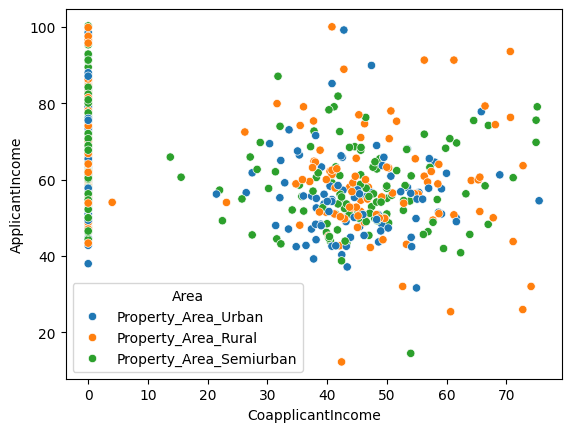

In [ ]:
df_copy=df.copy()
df_copy['Area']=df[['Property_Area_Rural','Property_Area_Semiurban','Property_Area_Urban']].idxmax(axis=1)

sns.scatterplot(x='CoapplicantIncome',y='ApplicantIncome',data=df_copy,hue='Area')

<Axes: xlabel='Education'>

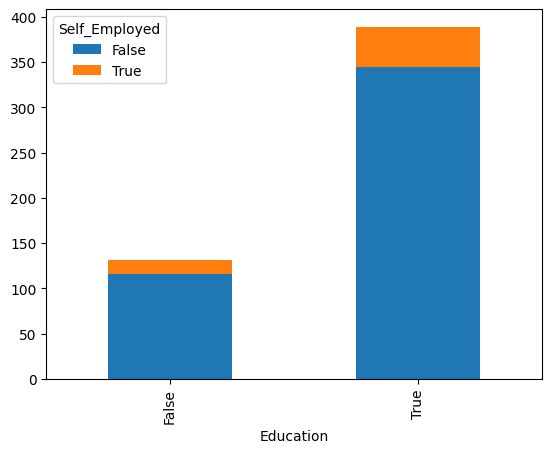

In [ ]:
pd.crosstab(df['Education'],df['Self_Employed']).plot(kind="bar",stacked=True)

<Axes: xlabel='Loan_Status', ylabel='count'>

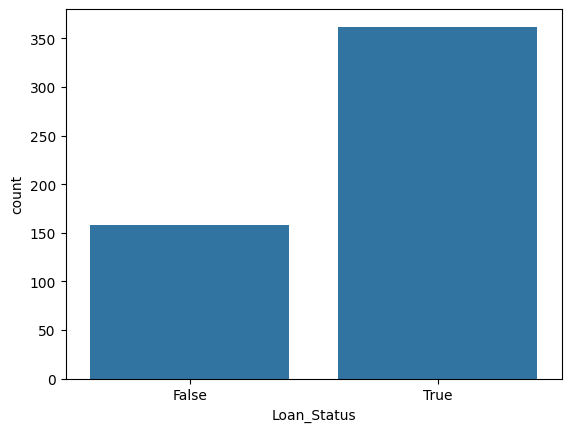

In [ ]:
sns.countplot(x='Loan_Status',data=df)

## Data processing

In [ ]:
# seperated feature and label
X=df.drop(['Loan_Status'],axis=1)
Y=df['Loan_Status']

<Axes: xlabel='count', ylabel='Loan_Status'>

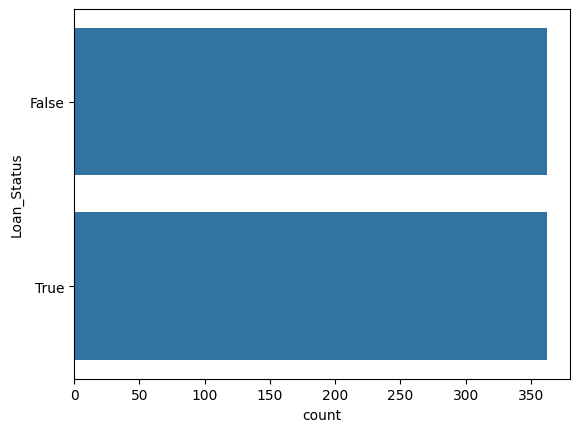

In [ ]:
#Avoid overfitting

X,Y=SMOTE().fit_resample(X,Y)
sns.countplot(y=Y,data=df)

In [ ]:
#spilitting dataset

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [ ]:
#normalize data uisng minmaxscaler

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,76.478755,0.000000,11.313708,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True
1,67.697858,38.832976,11.313708,360.0,1.0,True,True,False,True,False,False,True,False,True,False,False,False
2,54.772256,0.000000,8.124038,360.0,1.0,True,True,True,False,False,False,True,True,False,False,True,True
3,50.823223,48.559242,10.954451,360.0,1.0,True,True,True,False,False,False,False,False,False,False,True,True
4,77.459667,0.000000,11.874342,360.0,1.0,True,False,True,False,False,False,True,False,False,False,True,True


## Models

In [ ]:
#logistic regression

LRClassifier=LogisticRegression()
LRClassifier.fit(X_train,Y_train)
Y_pred=LRClassifier.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

0.8551724137931035


0.8551724137931035


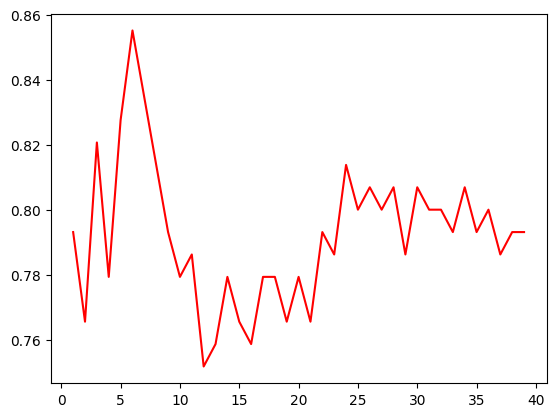

In [ ]:
#knn

k_score=[]

for k in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  k_score.append(knn.score(X_test,Y_test))

plt.plot(range(1,40),k_score,color='red')
print(max(k_score))

In [ ]:
svm=SVC()
svm.fit(X_train,Y_train)
Y_pred=svm.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

0.8482758620689655


In [ ]:
nbclassfier=GaussianNB()
nbclassfier.fit(X_train,Y_train)
Y_pred=nbclassfier.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

0.7724137931034483


0.8275862068965517


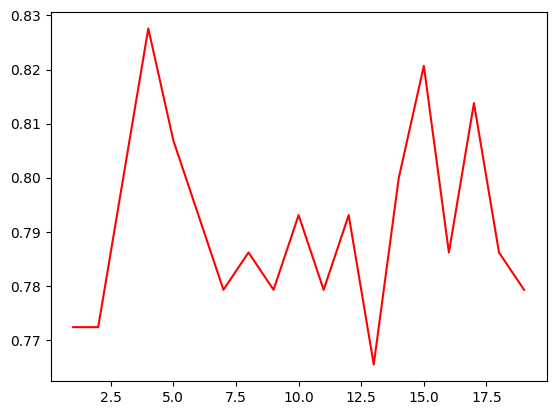

In [ ]:
scoreDT=[]

for i in range(1,20):
  dt=DecisionTreeClassifier(max_depth=i)
  dt.fit(X_train,Y_train)
  scoreDT.append(dt.score(X_test,Y_test))

plt.plot(range(1,20),scoreDT,color='red')
print(max(scoreDT))

0.8551724137931035


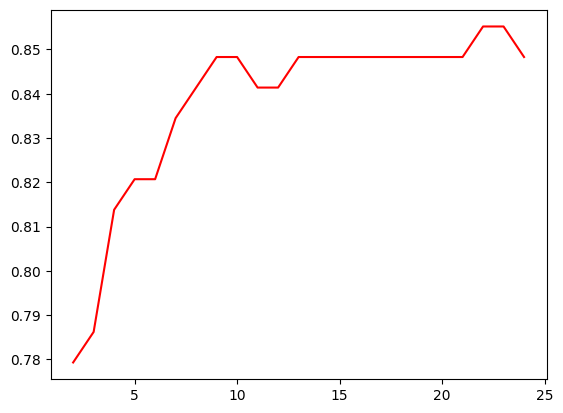

In [ ]:
scoreRF=[]

for i in range(2,25):
  rf=RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
  rf.fit(X_train,Y_train)
  scoreRF.append(rf.score(X_test,Y_test))

plt.plot(range(2,25),scoreRF,color='red')
print(max(scoreRF))